In [2]:
!wget https://launchpad.net/~mario-mariomedina/+archive/ubuntu/talib/+files/libta-lib0_0.4.0-oneiric1_amd64.deb -qO libta.deb
!wget https://launchpad.net/~mario-mariomedina/+archive/ubuntu/talib/+files/ta-lib0-dev_0.4.0-oneiric1_amd64.deb -qO ta.deb
!dpkg -i libta.deb ta.deb
!pip install ta-lib

Selecting previously unselected package libta-lib0.
(Reading database ... 123633 files and directories currently installed.)
Preparing to unpack libta.deb ...
Unpacking libta-lib0 (0.4.0-oneiric1) ...
Selecting previously unselected package ta-lib0-dev.
Preparing to unpack ta.deb ...
Unpacking ta-lib0-dev (0.4.0-oneiric1) ...
Setting up libta-lib0 (0.4.0-oneiric1) ...
Setting up ta-lib0-dev (0.4.0-oneiric1) ...
Processing triggers for man-db (2.10.2-1) ...
Processing triggers for libc-bin (2.35-0ubuntu3.4) ...
/sbin/ldconfig.real: /usr/local/lib/libumf.so.0 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libtcm_debug.so.1 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libhwloc.so.15 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libtbbbind.so.3 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libtbbmalloc.so.2 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libtbbbind_2_0.so.3 is not a symbolic link

/sbin/ldconfig.real: /usr

In [16]:
import pandas as pd
import numpy as np
import talib
import yfinance as yf
import matplotlib.pyplot as plt


In [6]:
df = pd.read_csv("/content/AAPL_historical_data.csv")

expected_columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']
df = df.loc[:, expected_columns]
print(df.head())

         Date      Open      High       Low     Close     Volume
0  1980-12-12  0.128348  0.128906  0.128348  0.128348  469033600
1  1980-12-15  0.122210  0.122210  0.121652  0.121652  175884800
2  1980-12-16  0.113281  0.113281  0.112723  0.112723  105728000
3  1980-12-17  0.115513  0.116071  0.115513  0.115513   86441600
4  1980-12-18  0.118862  0.119420  0.118862  0.118862   73449600


In [7]:
import talib

# Add SMA and EMA columns
df['SMA_20'] = talib.SMA(df['Close'], timeperiod=20)  # 20-day SMA
df['EMA_20'] = talib.EMA(df['Close'], timeperiod=20)  # 20-day EMA

print(df[['Close', 'SMA_20', 'EMA_20']].head())


      Close  SMA_20  EMA_20
0  0.128348     NaN     NaN
1  0.121652     NaN     NaN
2  0.112723     NaN     NaN
3  0.115513     NaN     NaN
4  0.118862     NaN     NaN


In [8]:
# Add RSI column
df['RSI'] = talib.RSI(df['Close'], timeperiod=14)  # 14-day RSI

print(df[['Close', 'RSI']].head())


      Close  RSI
0  0.128348  NaN
1  0.121652  NaN
2  0.112723  NaN
3  0.115513  NaN
4  0.118862  NaN


In [9]:
# Add MACD columns
df['MACD'], df['MACD_signal'], df['MACD_hist'] = talib.MACD(
    df['Close'],
    fastperiod=12,
    slowperiod=26,
    signalperiod=9
)

print(df[['Close', 'MACD', 'MACD_signal', 'MACD_hist']].head())


      Close  MACD  MACD_signal  MACD_hist
0  0.128348   NaN          NaN        NaN
1  0.121652   NaN          NaN        NaN
2  0.112723   NaN          NaN        NaN
3  0.115513   NaN          NaN        NaN
4  0.118862   NaN          NaN        NaN


In [20]:
!pip install pynance



In [22]:
# Load ticker data for a specific stock
ticker = yf.Ticker('AAPL')  # Replace 'AAPL' with your stock symbol
print(ticker.info)


{'address1': 'One Apple Park Way', 'city': 'Cupertino', 'state': 'CA', 'zip': '95014', 'country': 'United States', 'phone': '(408) 996-1010', 'website': 'https://www.apple.com', 'industry': 'Consumer Electronics', 'industryKey': 'consumer-electronics', 'industryDisp': 'Consumer Electronics', 'sector': 'Technology', 'sectorKey': 'technology', 'sectorDisp': 'Technology', 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. The company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, and HomePod. It also provides AppleCare support and cloud services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts, as w

In [23]:
print(ticker.financials)


                                                        2024-09-30  \
Tax Effect Of Unusual Items                                    0.0   
Tax Rate For Calcs                                        0.240912   
Normalized EBITDA                                   134661000000.0   
Net Income From Continuing Operation Net Minori...   93736000000.0   
Reconciled Depreciation                              11445000000.0   
Reconciled Cost Of Revenue                          210352000000.0   
EBITDA                                              134661000000.0   
EBIT                                                123216000000.0   
Net Interest Income                                            NaN   
Interest Expense                                               NaN   
Interest Income                                                NaN   
Normalized Income                                    93736000000.0   
Net Income From Continuing And Discontinued Ope...   93736000000.0   
Total Expenses      

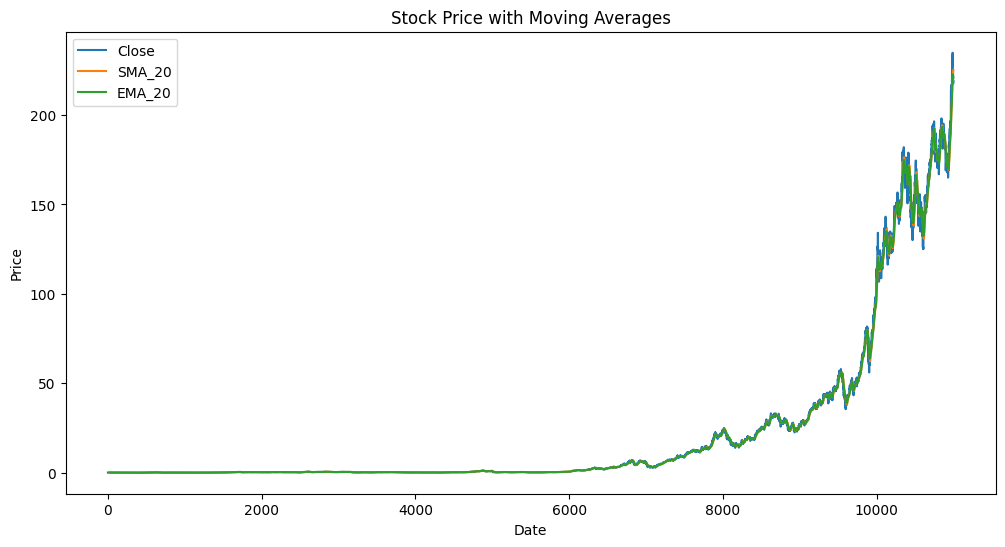

In [24]:
# Plot Close, SMA, and EMA
df[['Close', 'SMA_20', 'EMA_20']].plot(figsize=(12, 6))
plt.title("Stock Price with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()


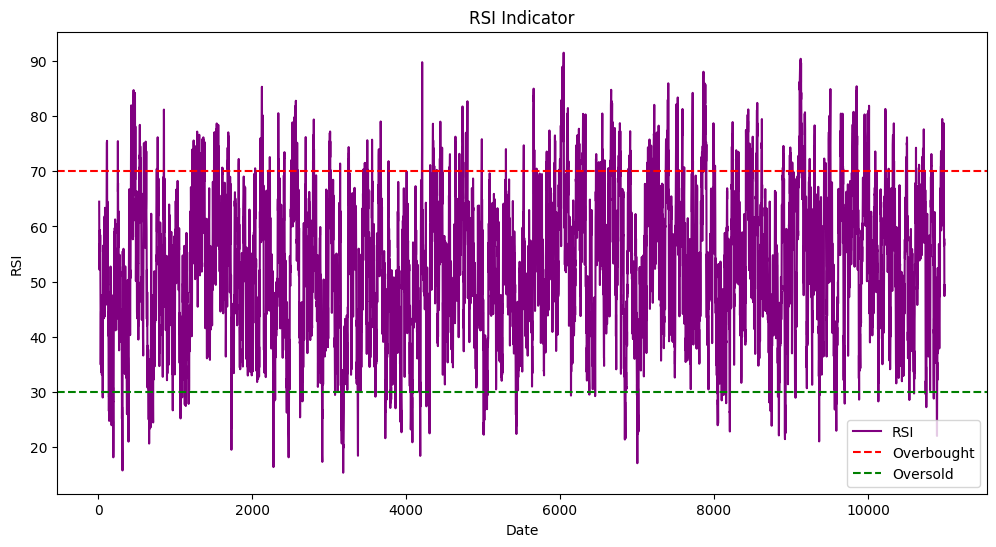

In [25]:
# Plot RSI
df['RSI'].plot(figsize=(12, 6), color='purple')
plt.axhline(70, linestyle='--', color='red', label='Overbought')
plt.axhline(30, linestyle='--', color='green', label='Oversold')
plt.title("RSI Indicator")
plt.xlabel("Date")
plt.ylabel("RSI")
plt.legend()
plt.show()


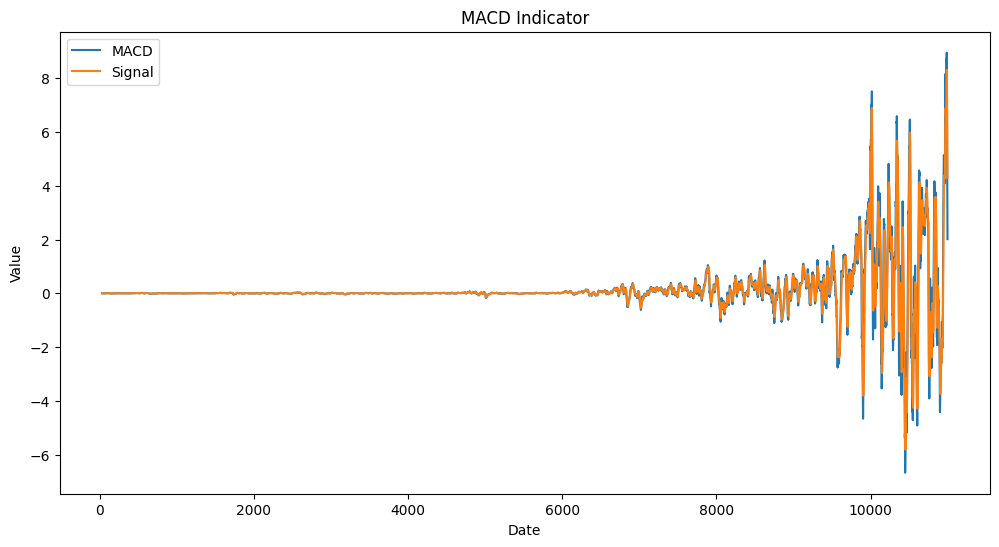

In [26]:
# Plot MACD
df[['MACD', 'MACD_signal']].plot(figsize=(12, 6))
plt.title("MACD Indicator")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend(["MACD", "Signal"])
plt.show()
